In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Machine Learning/spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns', inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\pravin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

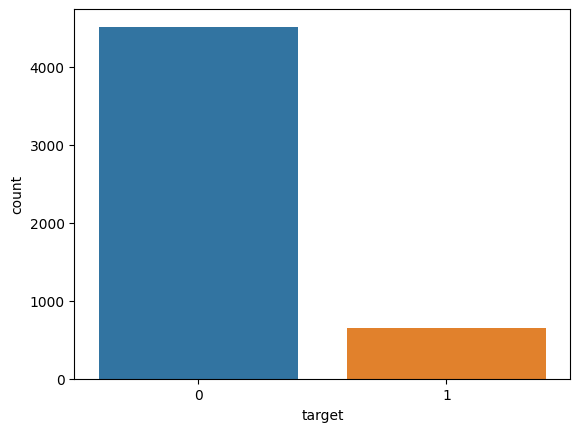

In [14]:
sns.countplot(df['target'])

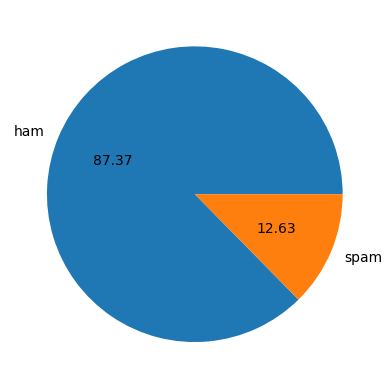

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pravin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pravin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)

In [19]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [23]:
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

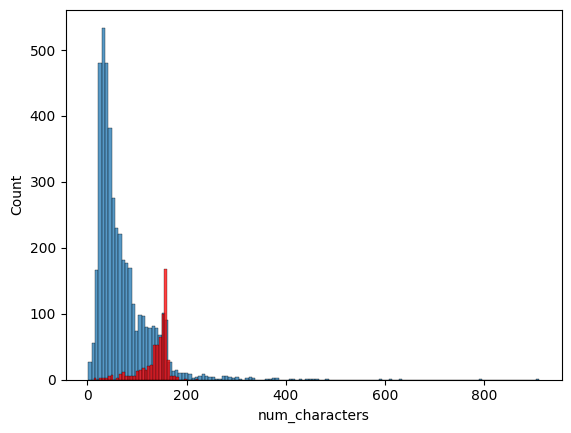

In [24]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

In [25]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


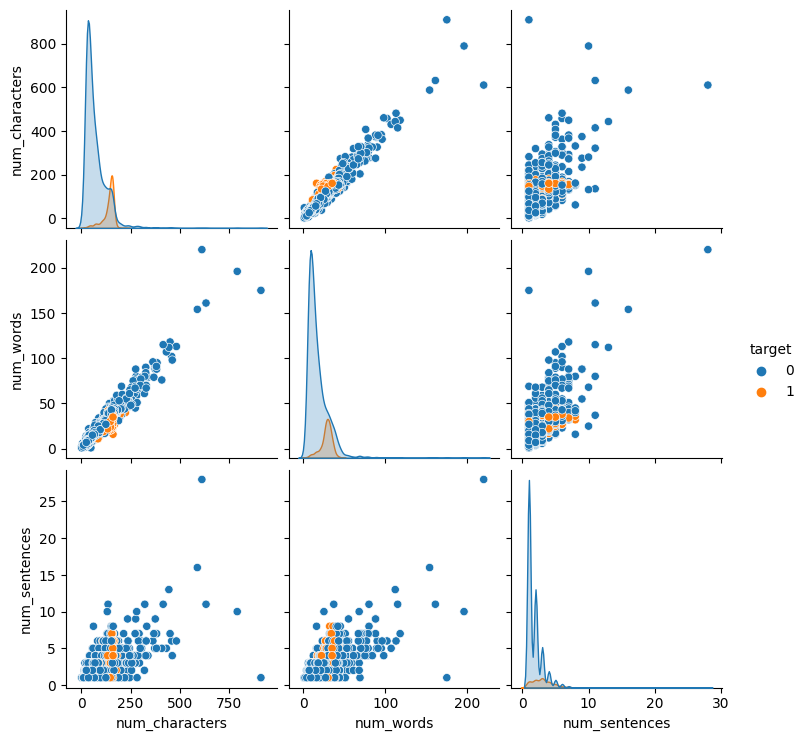

In [26]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

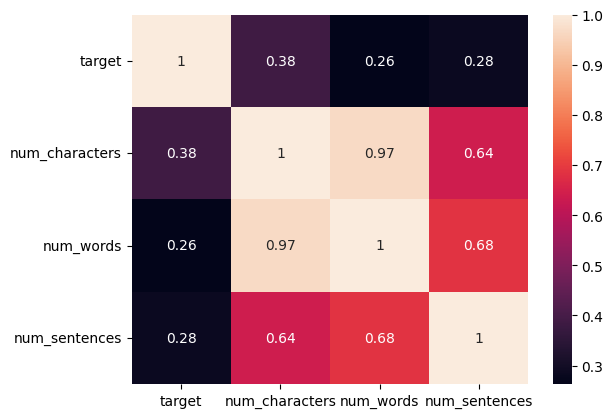

In [27]:
sns.heatmap(df.corr(), annot=True)

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
        


In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


In [33]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [35]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

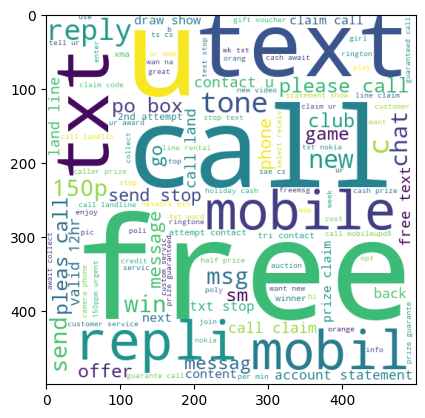

In [36]:
plt.imshow(spam_wc)

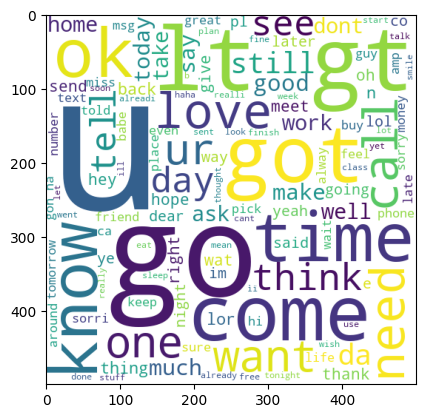

In [37]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc) 

In [38]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

19878

In [41]:
from collections import Counter

c:\users\pravin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


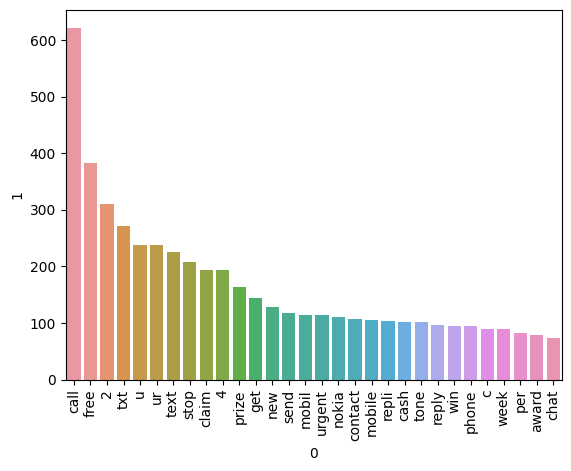

In [49]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

c:\users\pravin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


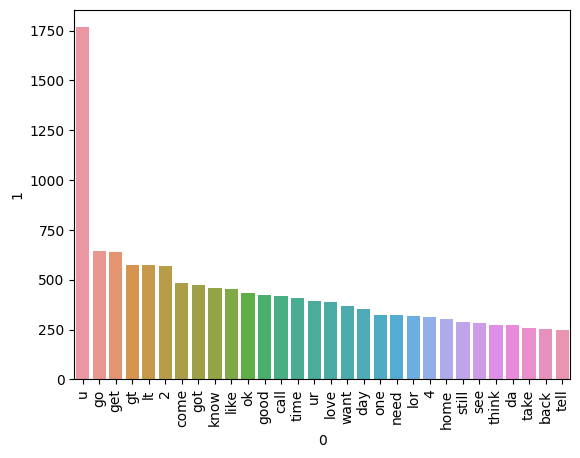

In [50]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
#Model Building

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()
X = tf.fit_transform(df['transformed_text']).toarray()

In [71]:
y = df['target'].values

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [75]:
gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

In [76]:
y1 = gnb.predict(X_test)
y2 = bnb.predict(X_test)
y3 = mnb.predict(X_test)

In [77]:
print("Accuracy")
print(accuracy_score(y_test, y1))
print(accuracy_score(y_test, y2))
print(accuracy_score(y_test, y3))

Accuracy
0.8994197292069632
0.9661508704061895
0.9516441005802708


In [78]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y1))
print(confusion_matrix(y_test, y2))
print(confusion_matrix(y_test, y3))

Confusion Matrix
[[813  83]
 [ 21 117]]
[[889   7]
 [ 28 110]]
[[896   0]
 [ 50  88]]


In [79]:
print('Precision Score')
print(precision_score(y_test,y1))
print(precision_score(y_test,y2))
print(precision_score(y_test,y3))

Precision Score
0.585
0.9401709401709402
1.0
